In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Classification (Siniflandirma)

## Logistic Regression

* Logistic Regression bir siniflandirma algoritmasidir.

* Görseldeki hayvanın kedi mi, köpek mi olduğu veya verilmiş olan bilgilerin bir erkeğe mi yoksa bir kadına mı ait olduğunu tahmin etme gibi iki sınıflı sınıflandırma problemlerinde sıkça kullanılır.

* Lineer regresyon ile arasındaki en büyük farkı iki sınıfı birbirinden ayıracak çizgiyi nasıl uyguladığıdır (fit).

* Lineer regresyon, optimum çizgiyi çizmek için “En Küçük Kareler Yöntemi” (Least Squares) kullanırken, lojistik regresyon “Maksimum Olabilirlik” (Maximum Likelihood) kullanır.

* Lojistik regresyon, sınıflandırma yapmak için Sigmoid (Lojistik) Fonksiyonu kullanır. Sigmoid fonksiyonu “S” şeklinde bir eğridir.

In [2]:
from IPython.display import display, Image

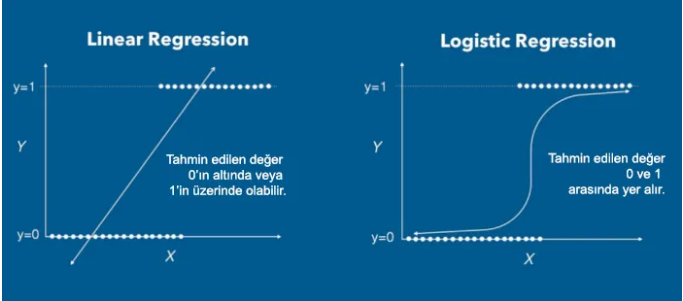

In [3]:
display(Image(filename='images/LogisticAndLineer.png'))

In [4]:
dataset = pd.read_csv('Data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [6]:
X.shape

(400, 2)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [8]:
#Standartizasyon
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)# Modelimizin hizini belirleyen bir hiperparametre (C)
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns=['Original Purchased', 'Predicted Purchase'])

In [12]:
hesaplama

,Original Purchased,Predicted Purchase
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


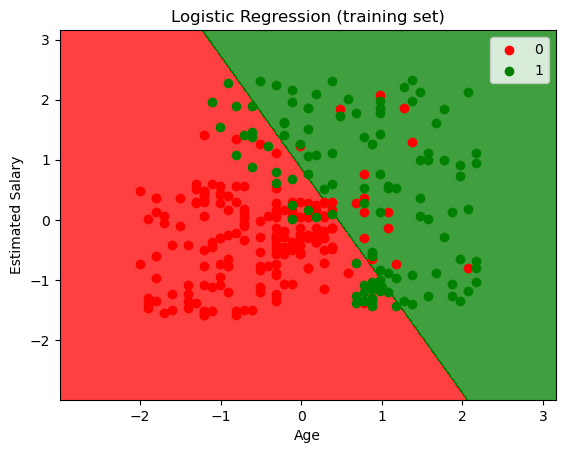

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha= 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],c = ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


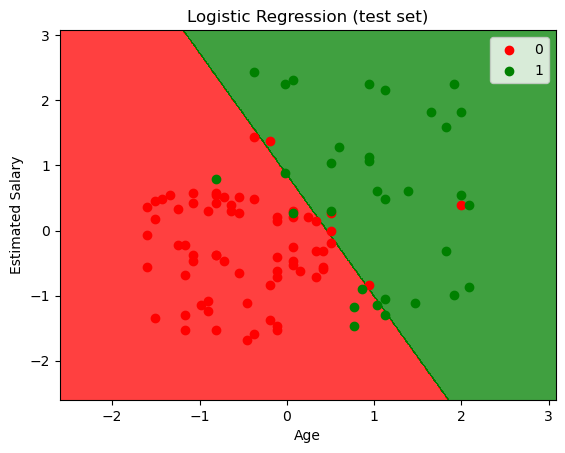

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha= 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],c = ListedColormap(('red','green'))(i), label=j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

---

## Confusion Matrix (Karmasiklik Matrisi)
* Makine öğrenmesinde kullanılan sınıflandırma modellerinin performansını değerlendirmek için hedef niteliğe ait tahminlerin ve gerçek değerlerin karşılaştırıldığı hata matrisi sıklıkla kullanılmaktadır.
* Her ne olursa olsun sınıflandırma tahminleri şu dört değerlendirmeden birine sahip olacaktır:
1. Doğruya doğru demek (True Positive – TP) DOĞRU
2. Yanlışa yanlış demek (True Negative – TN) DOĞRU
3. Doğruya yanlış demek (False Positive – FP) YANLIŞ
4. Yanlışa doğru demek(False Negative – FN) YANLIŞ

* Accuracy : *(TN + TP) / Tamami*
* Precision : *TP / (FP + TP)* ---(Pozitiflerin kesinligi)
* Recall veya Sensitivity : *TP / (TP + FN)* ---(False negatiflere gore performans)
* Specificity : *TN / (TN + FP)* ---(Recall'in tam karsiligi False pozitiflere gore)
* f1-Score : *2 * (Precision * Recall) / (Precision+Recall)* ---(Precision ve Recall u icinde barindiran bir score. Hatali sininflandirilmis case'lerin de daha iyi bir olcumunu saglar)

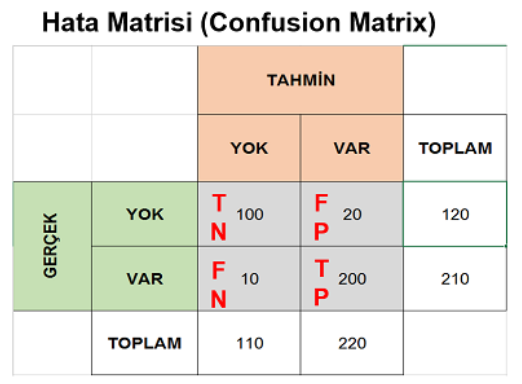

In [15]:
display(Image(filename = 'images/Confusion.png'))

## Support Vector Machines ( Destek Vektor Makineleri)
* Bir düzlem üzerine yerleştirilmiş noktaları ayırmak için bir doğru çizer. Bu doğrunun, iki sınıfının noktaları için de maksimum uzaklıkta olmasını amaçlar. Karmaşık ama küçük ve orta ölçekteki veri setleri için uygundur.
* !!! Hem sayisal hem de kategorik verileri siniflandirabiliyor.

* Bizim SVM deki amacimiz : Biz verimizi oyle siniflara bolelim ki bir tane MMH(Maximum Marginal Hyperplane) bulalim.
* MMH : Siniflari ayiracagimiz dogrunun adi
* Destek Vektor : Hiper duzleme en yakin olan datalarimiz. 

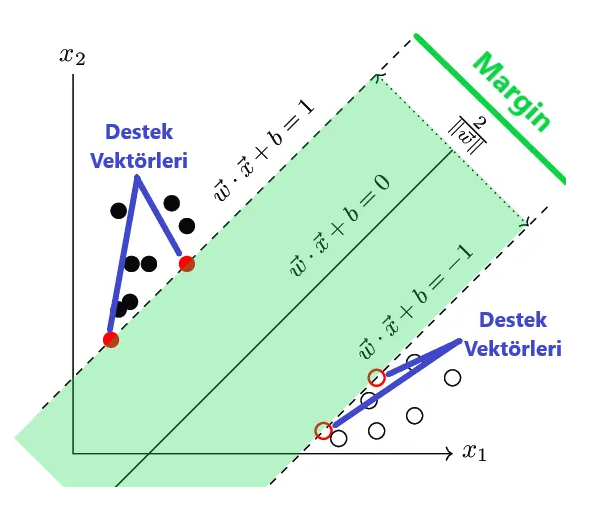

In [16]:
display(Image(filename='images/SupportVector.png'))

In [17]:
from scipy import stats
import seaborn as sns; sns.set()

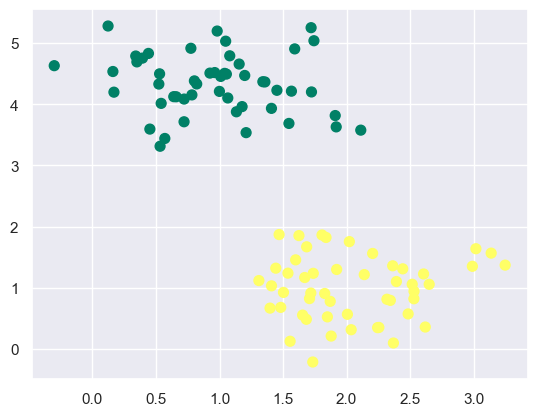

In [19]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.5)
plt.scatter(X[:,0], X[:,1], c=y,s=50,cmap='summer')
plt.show()

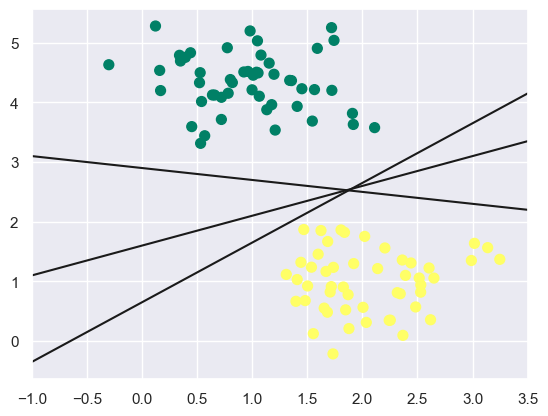

In [20]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y,s=50,cmap='summer')
for m, b in [(1, 0.65), [0.5,1.6], [-0.2, 2.9]]:
    plt.plot(xfit, m*xfit +b, '-k')
plt.xlim(-1, 3.5)
plt.show()

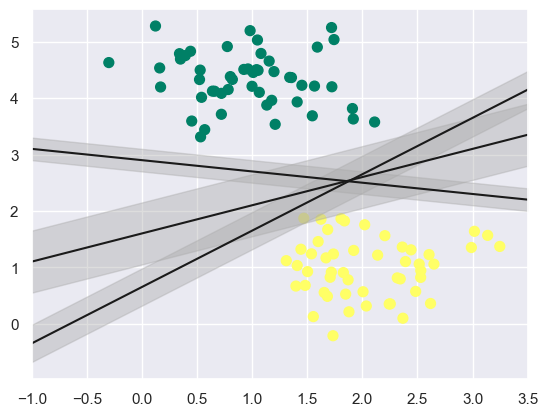

In [21]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y,s=50,cmap='summer')
for m, b, d in [(1, 0.65, 0.33), [0.5,1.6, 0.55], [-0.2, 2.9, 0.2]]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit,yfit-d, yfit +d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)
plt.xlim(-1, 3.5)
plt.show()

In [23]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10) # Kernel: bir imput alip onu ihtiyac olan duruma cevirmek
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [28]:
def decision_function(model, ax=None, plot_support = True):
    if ax is None:
        ax=plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth=1, facecolors = 'None')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


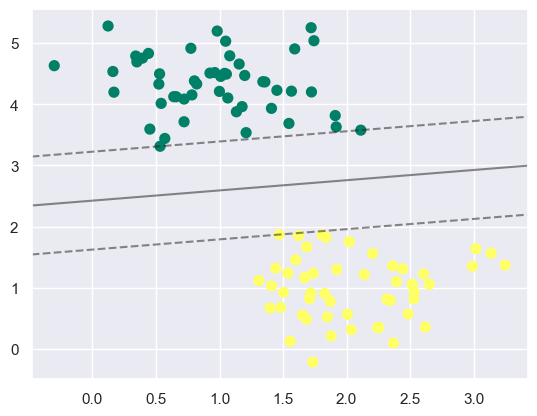

In [29]:
plt.scatter(X[:,0], X[:,1], c=y,s=50,cmap='summer')
decision_function(model)

In [30]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])